# Brain Age Prediction Lasso BaggedKNN


In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Integer

class BaggedKNNRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="BaggedKNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = BaggingRegressor
        
        if params is None:
            self.params = {
                'n_estimators': 10,
                'max_samples': 0.8,
                'max_features': 1.0,
                'random_state': 42
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(10, 100),
                'max_samples': Real(0.1, 1.0),
                'max_features': Real(0.1, 1.0)
            }

        #estimator=
        self.model_params_search = {
            "estimator" : KNeighborsRegressor()
        }
        self.model_params_train = {
            "estimator" : KNeighborsRegressor()
        }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = BaggedKNNRegressor()
#model = BaggedKNNRegressorCustom()
Plotters = Plotter()

# Parametros de Plot
colorset = 'SaddleBrown'
nameset = 'BaggedKNN'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

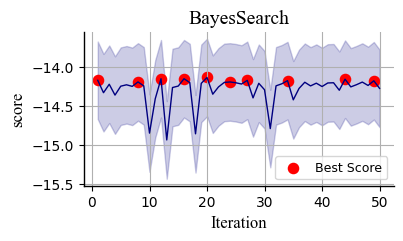

Top 1: Iteration 20, Score -14.131902518951389
Top 2: Iteration 16, Score -14.14789320934913
Top 3: Iteration 12, Score -14.147983542188806
Top 4: Iteration 44, Score -14.1537171062125
Top 5: Iteration 1, Score -14.167919681335835
Top 6: Iteration 27, Score -14.16900111927546
Top 7: Iteration 34, Score -14.172378148021568
Top 8: Iteration 49, Score -14.174008553580922
Top 9: Iteration 8, Score -14.189115341728979
Top 10: Iteration 24, Score -14.189459934875066


In [7]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [8]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'max_features': 0.5410757013397223,
  'max_samples': 0.7210103579635123,
  'n_estimators': 91},
 {'max_features': 0.4843684764145345, 'max_samples': 1.0, 'n_estimators': 100},
 {'max_features': 0.5579778581025173, 'max_samples': 1.0, 'n_estimators': 100},
 {'max_features': 0.768969163955489,
  'max_samples': 0.6954392262615243,
  'n_estimators': 100},
 {'max_features': 0.46909356296798244,
  'max_samples': 0.7549531688595925,
  'n_estimators': 94},
 {'max_features': 0.45965525607047775,
  'max_samples': 1.0,
  'n_estimators': 100},
 {'max_features': 0.8754377707588161,
  'max_samples': 0.49454283924795484,
  'n_estimators': 100},
 {'max_features': 0.5232720851122008,
  'max_samples': 0.8856695473395395,
  'n_estimators': 100},
 {'max_features': 0.5890627609212813,
  'max_samples': 0.9280083037935848,
  'n_estimators': 55},
 {'max_features': 0.8043589880588451,
  'max_samples': 0.592703858845018,
  'n_estimators': 100}]

In [9]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_

In [ ]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [31]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     581.6
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          8.94e-107
Time:                        01:19:08   Log-Likelihood:                -4781.4
No. Observations:                1323   AIC:                             9567.
Df Residuals:                    1321   BIC:                             9577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9639      0.624     56.044      0.0

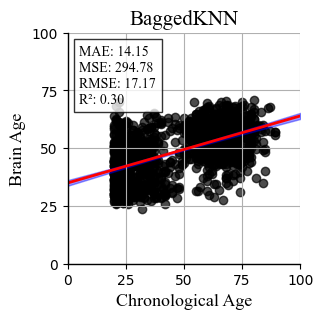

Error medio absoluto: 14.151732645031965
Error cuadrático medio: 294.7808813567993
Raíz del error cuadrático medio: 17.16918406205721
Coeficiente de determinación (R²): 0.30176737824027644


In [32]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

In [ ]:
# with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
#     pickle.dump(shap_summary_sorted_CN, f)

# with open('results_model/shap_values_CN.pkl', 'wb') as f:
#     pickle.dump(shap_values_CN, f)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_right', 1428.692536129636),
 ('IAF_OCC_left', 1333.2190458561615),
 ('TF_MFG_right', 687.4016899143455),
 ('Low_subj_spec_EPP_PARIET_right', 672.1393170729858),
 ('Low_subj_spec_EPP_OCC_right', 645.80549332391),
 ('Low_subj_spec_EPP_PARIET_left', 634.2633210344744),
 ('Low_subj_spec_RPD_CING_right', 632.889757516207),
 ('Alpha2_canon_RPD_CING_right', 596.2272194600729),
 ('IAF_HPC_left', 579.4420053270869),
 ('IAF_INS_left', 578.26494812049),
 ('High_subj_spec_RPD_CING_right', 572.5654231963296),
 ('High_subj_spec_EPP_CING_right', 565.8440465859056),
 ('TF_ORB_right', 530.7755087070691),
 ('Low_subj_spec_RPD_CING_left', 499.03957481410333),
 ('Alpha2_canon_RPD_CING_left', 489.342895553152),
 ('Low_subj_spec_RPD_HPC_left', 480.08631798725264),
 ('Low_subj_spec_RPD_HPC_right', 471.02329492070834),
 ('Alpha2_canon_RPD_PARIET_right', 461.3431694237756),
 ('Alpha2_canon_EPP_PARIET_right', 459.13974094093624),
 ('Alpha2_canon_RPD_HPC_right', 457.62041010445995),
 ('Alpha2_canon_EP

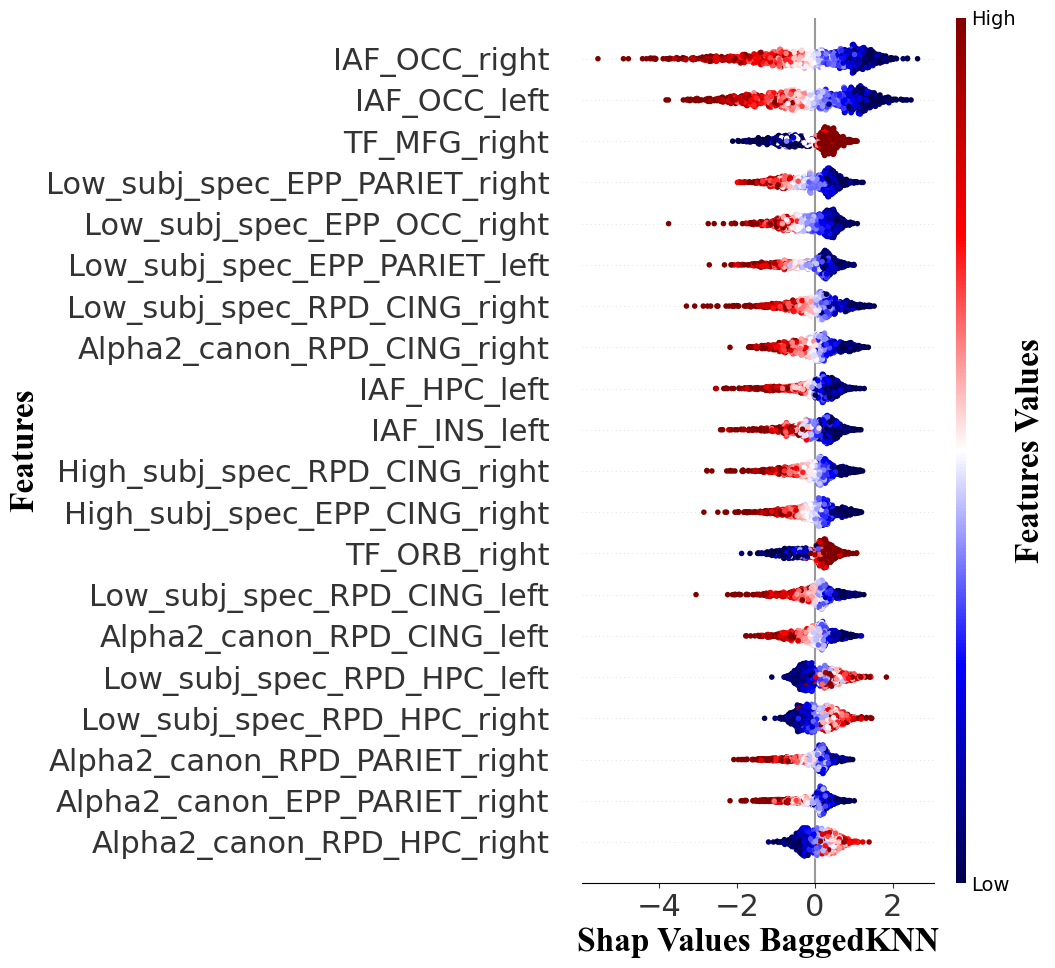

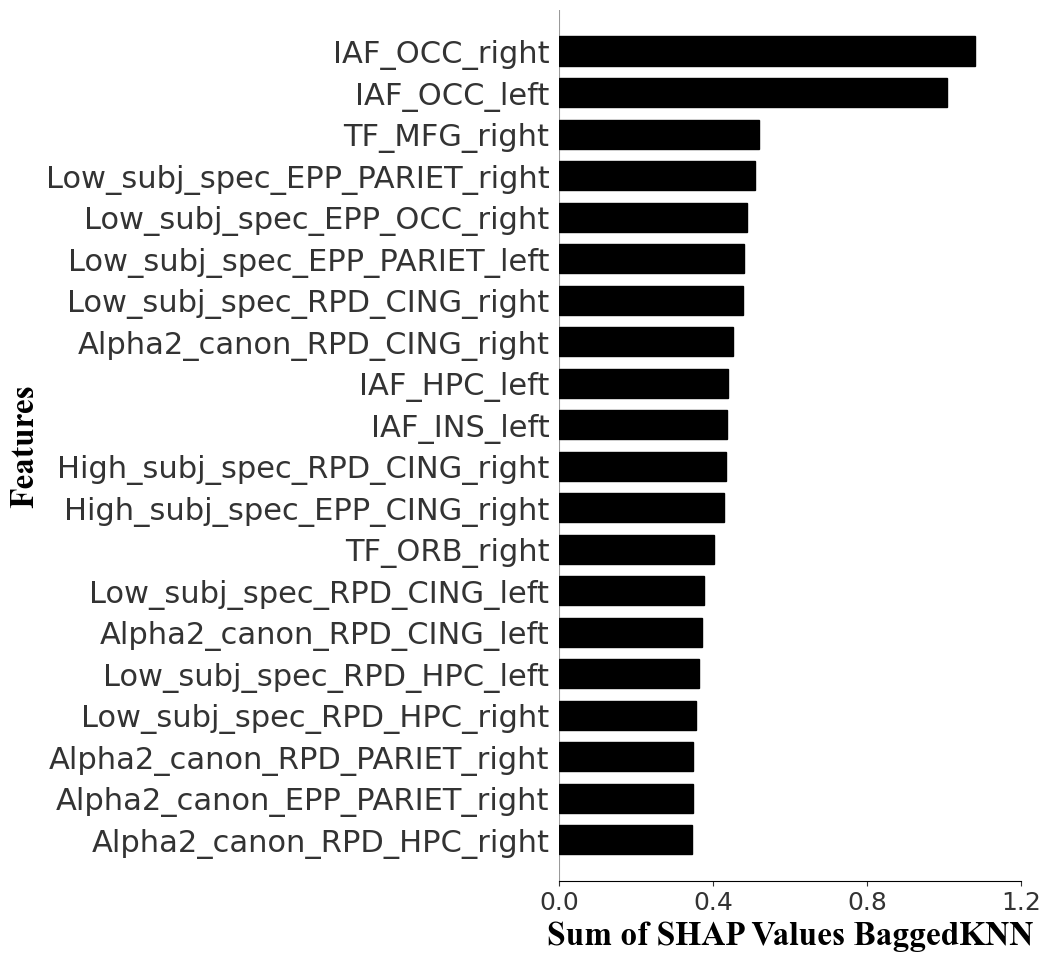

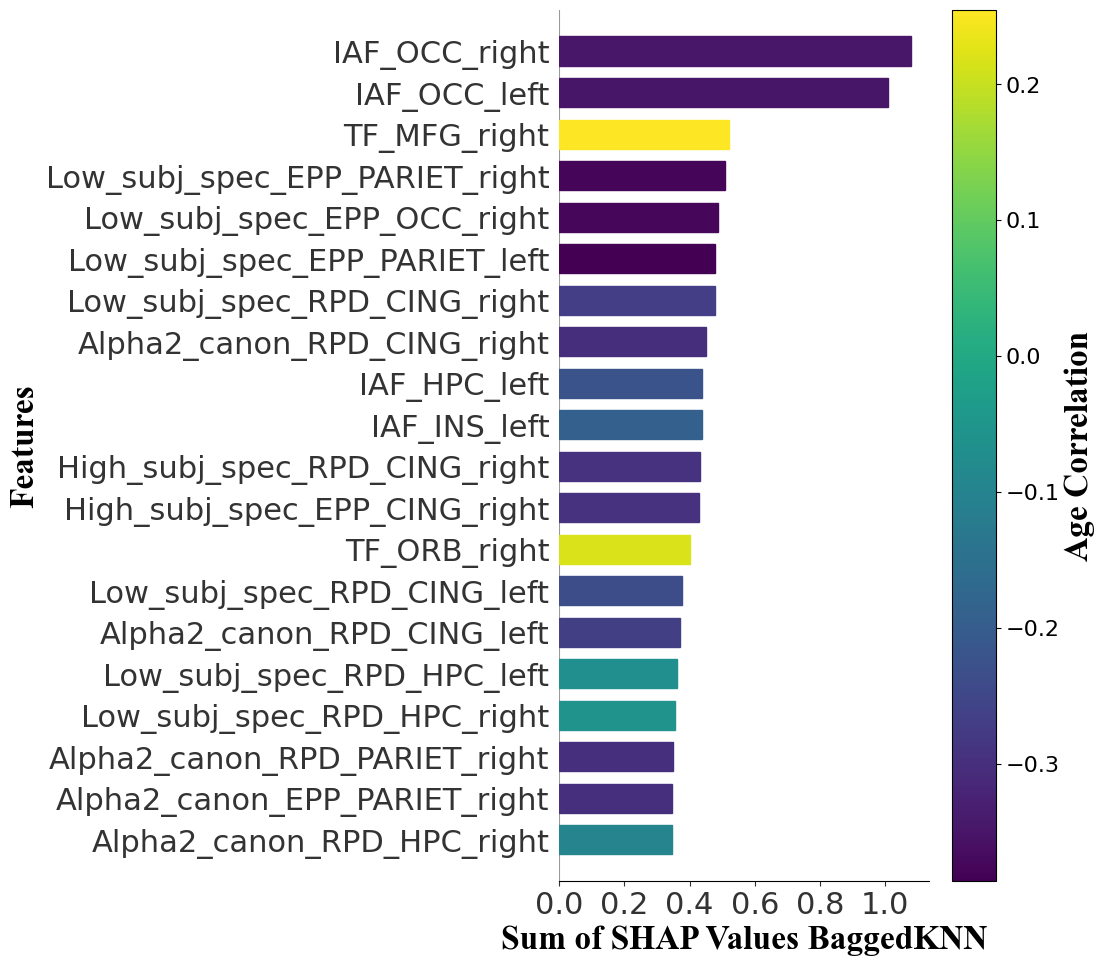

In [8]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [14]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_right: 1.000000
OCC_left: 0.642671
CING_right: 0.592489
MFG_right: 0.331358
PARIET_right: 0.324001
PARIET_left: 0.305743
HPC_left: 0.279317
INS_left: 0.278749


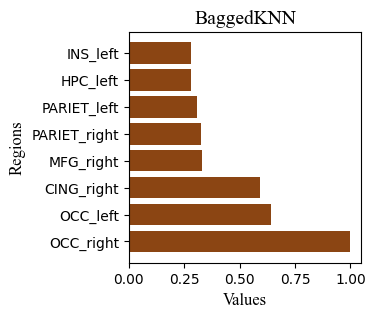

In [25]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

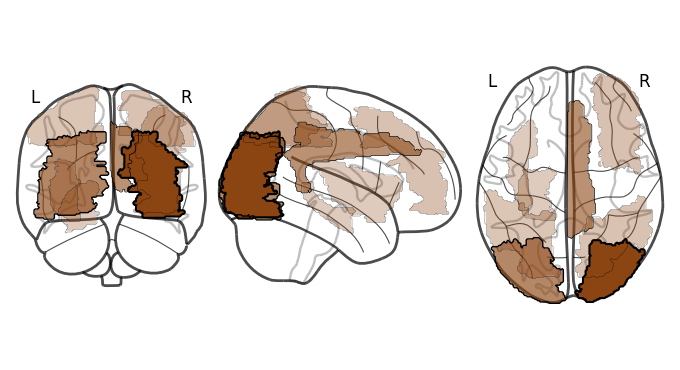

In [24]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)